In [1]:
##This cell will be used for all required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

### Section 1:  Loading in dataset as produced from running YSCB benchmark tests on each database

In [2]:
benchmark_df = pd.read_csv("yscb_benchmark.csv")

In [3]:
benchmark_df.head()

,database,workload,num_records,runtime,throughput,insert_latency
0,Cassandra,a,10000,10705,934.14292,784.6540
1,Cassandra,a,20000,17097,1169.79587,712.6870
2,Cassandra,a,30000,23228,1291.54469,672.5020
3,Cassandra,a,40000,32404,1234.41550,726.5664
4,Cassandra,a,50000,57401,871.06490,1022.0900


creating seperate dataframes for each workflow tested (i.e A, B and C) :

In [4]:
cass_a = benchmark_df[(benchmark_df['database'] == 'Cassandra') & (benchmark_df['workload'] == 'a')]
cass_b = benchmark_df[(benchmark_df['database'] == 'Cassandra') & (benchmark_df['workload'] == 'b')]
cass_c = benchmark_df[(benchmark_df['database'] == 'Cassandra') & (benchmark_df['workload'] == 'c')]

mqsql_a = benchmark_df[(benchmark_df['database'] == 'MySQL') & (benchmark_df['workload'] == 'a')]
mqsql_b = benchmark_df[(benchmark_df['database'] == 'MySQL') & (benchmark_df['workload'] == 'b')]
mqsql_c = benchmark_df[(benchmark_df['database'] == 'MySQL') & (benchmark_df['workload'] == 'c')]

### Section 2: Visualisations
Using line graphs to visualise key performance metrics comparisions:

### plotting the runtime comparisions for Workflow A (i.e 50% read, 50% write):

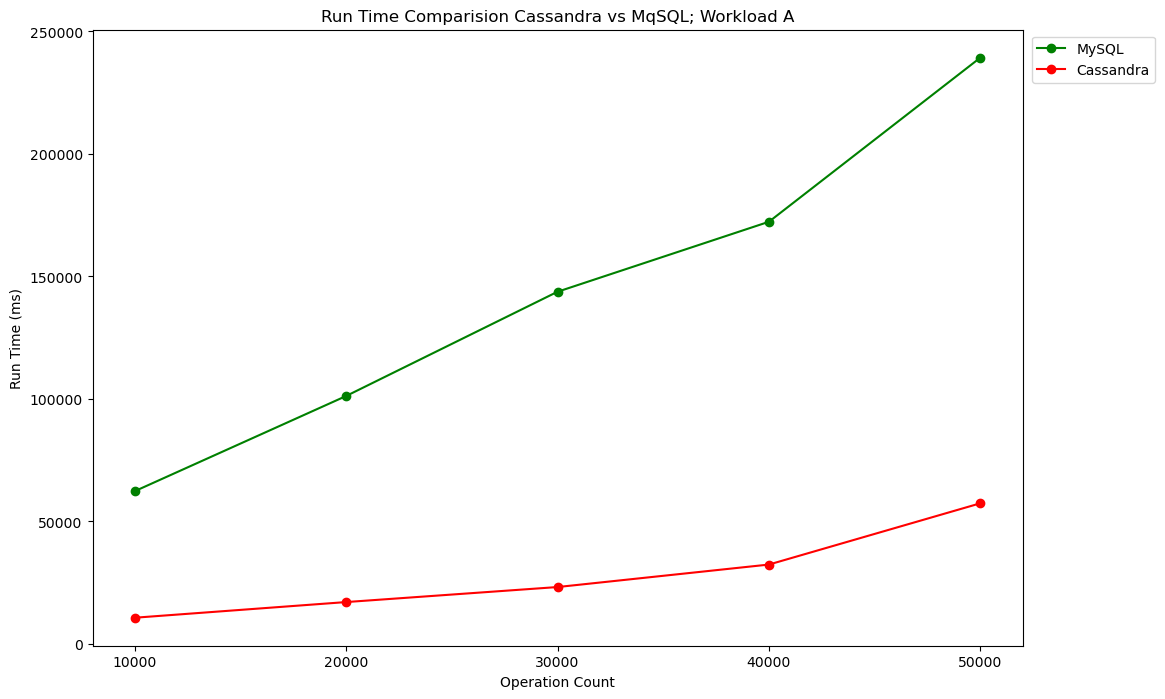

In [6]:
#plotting the runtime comparisions for Workflow A (i.e 50% read, 50% write)
plt.figure(figsize=(12,8))
plt.plot(mqsql_a['num_records'], mqsql_a['runtime'], marker='o', linestyle='-',label='MySQL',color='green')
plt.plot(cass_a['num_records'], cass_a['runtime'], marker='o', linestyle='-',label='Cassandra',color='red')

plt.xlabel('Operation Count')
plt.ylabel('Run Time (ms)')
plt.title('Run Time Comparision Cassandra vs MqSQL; Workload A')
plt.xticks(cass_a['num_records'])
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

### plotting the run time comparisions for all workflows:

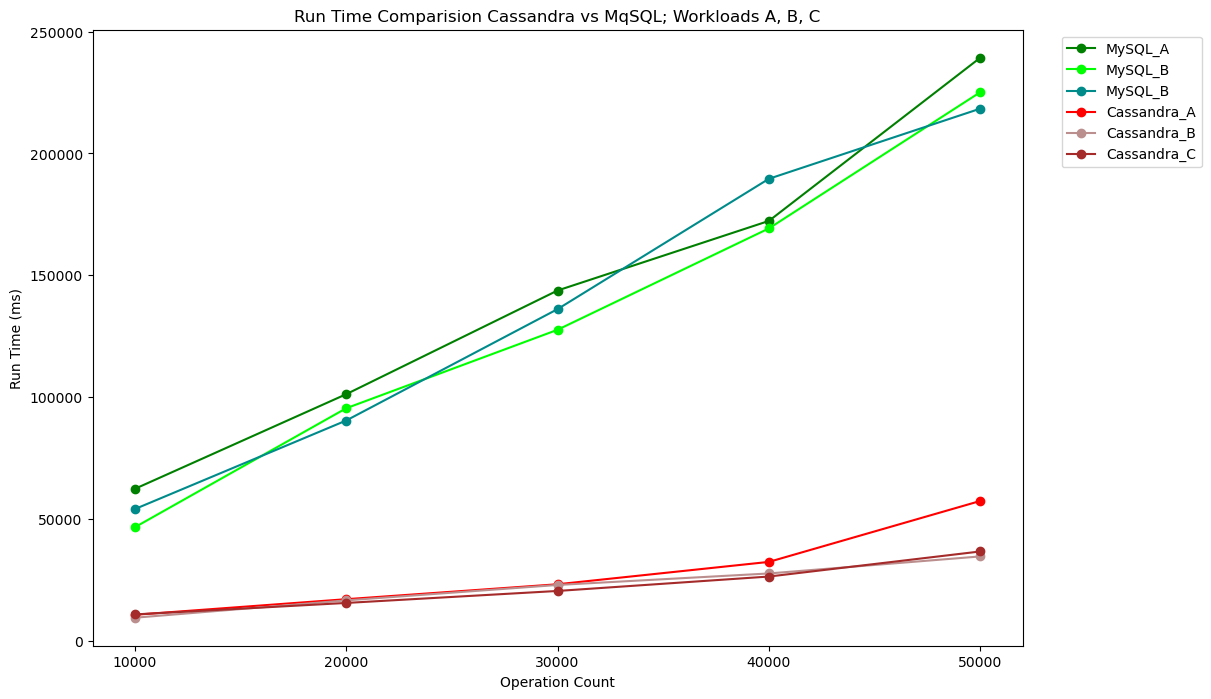

In [7]:
plt.figure(figsize=(12,8))
plt.plot(mqsql_a['num_records'], mqsql_a['runtime'], marker='o', linestyle='-',label='MySQL_A', color= 'green')
plt.plot(mqsql_b['num_records'], mqsql_b['runtime'], marker='o', linestyle='-',label='MySQL_B', color= 'lime')
plt.plot(mqsql_c['num_records'], mqsql_c['runtime'], marker='o', linestyle='-',label='MySQL_B', color= 'darkcyan')

plt.plot(cass_a['num_records'], cass_a['runtime'], marker='o', linestyle='-',label='Cassandra_A', color= 'red')
plt.plot(cass_b['num_records'], cass_b['runtime'], marker='o', linestyle='-',label='Cassandra_B', color= 'rosybrown')
plt.plot(cass_c['num_records'], cass_c['runtime'], marker='o', linestyle='-',label='Cassandra_C', color= 'brown')

plt.xlabel('Operation Count')
plt.ylabel('Run Time (ms)')
plt.title('Run Time Comparision Cassandra vs MqSQL; Workloads A, B, C')
plt.xticks(cass_a['num_records'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

### plotting the throughput comparisions for both databases for all workflows:

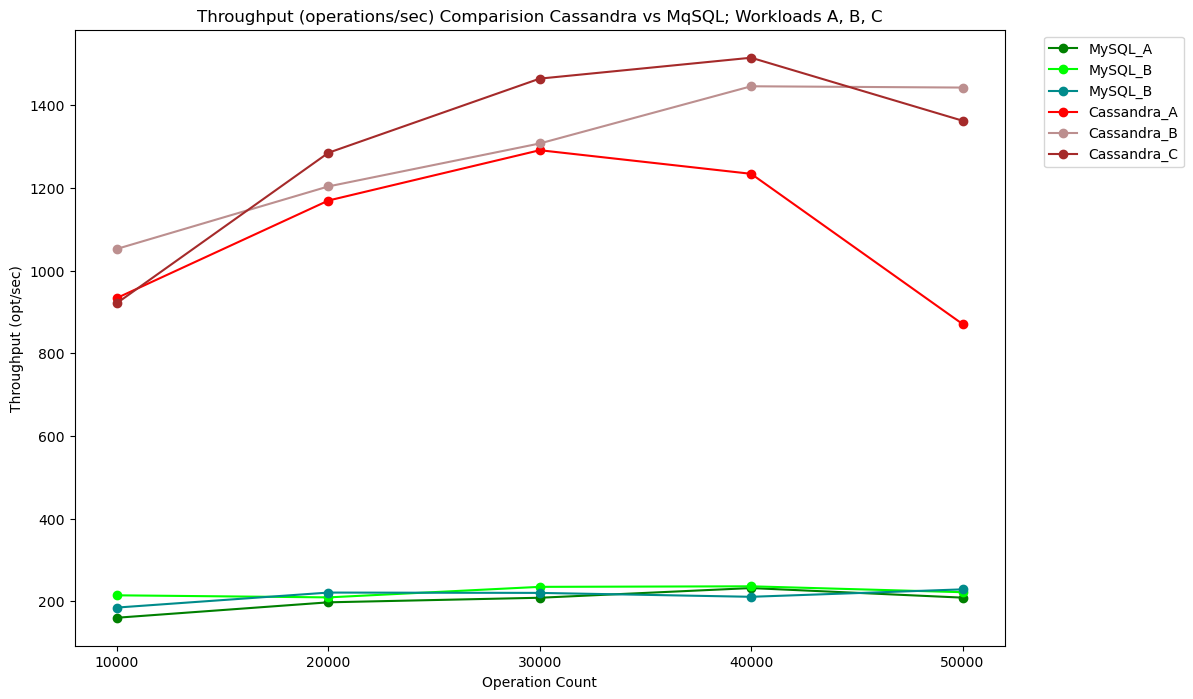

In [8]:
plt.figure(figsize=(12,8))
plt.plot(mqsql_a['num_records'], mqsql_a['throughput'], marker='o', linestyle='-',label='MySQL_A', color= 'green')
plt.plot(mqsql_b['num_records'], mqsql_b['throughput'], marker='o', linestyle='-',label='MySQL_B', color= 'lime')
plt.plot(mqsql_c['num_records'], mqsql_c['throughput'], marker='o', linestyle='-',label='MySQL_B', color= 'darkcyan')

plt.plot(cass_a['num_records'], cass_a['throughput'], marker='o', linestyle='-',label='Cassandra_A', color= 'red')
plt.plot(cass_b['num_records'], cass_b['throughput'], marker='o', linestyle='-',label='Cassandra_B', color= 'rosybrown')
plt.plot(cass_c['num_records'], cass_c['throughput'], marker='o', linestyle='-',label='Cassandra_C', color= 'brown')

plt.xlabel('Operation Count')
plt.ylabel('Throughput (opt/sec)')
plt.title('Throughput (operations/sec) Comparision Cassandra vs MqSQL; Workloads A, B, C')
plt.xticks(cass_a['num_records'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

### plotting the average insert latency comparisions for both databases for all workflows:

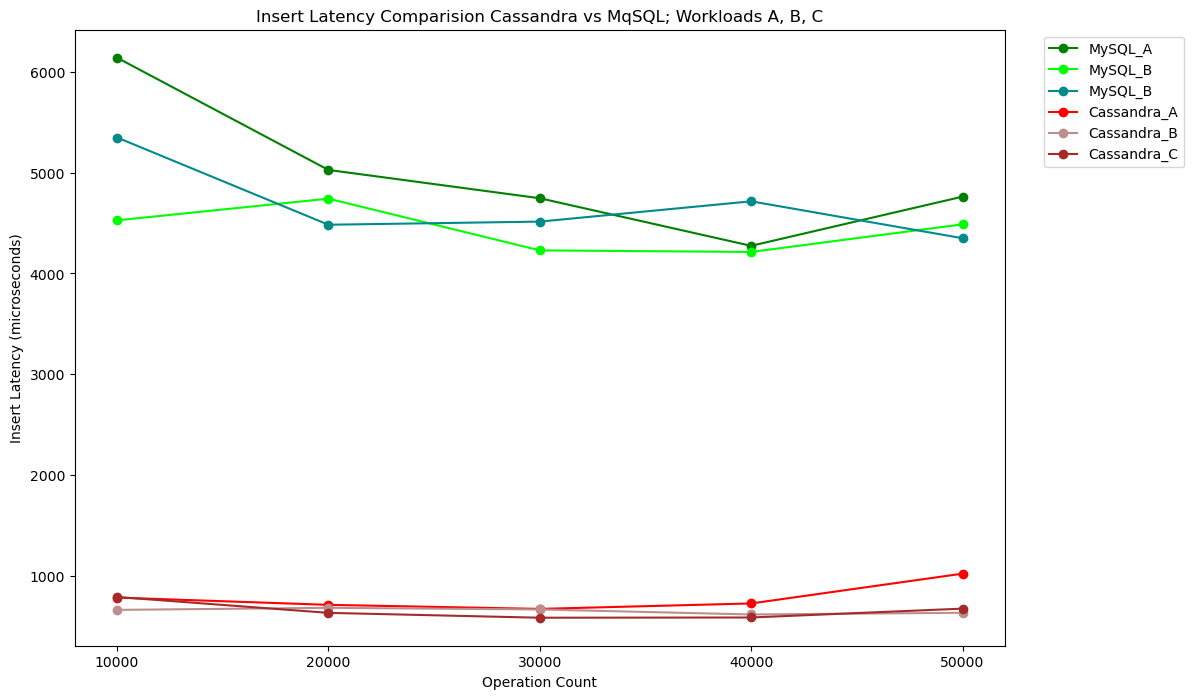

In [9]:
plt.figure(figsize=(12,8))
plt.plot(mqsql_a['num_records'], mqsql_a['insert_latency'], marker='o', linestyle='-',label='MySQL_A', color= 'green')
plt.plot(mqsql_b['num_records'], mqsql_b['insert_latency'], marker='o', linestyle='-',label='MySQL_B', color= 'lime')
plt.plot(mqsql_c['num_records'], mqsql_c['insert_latency'], marker='o', linestyle='-',label='MySQL_B', color= 'darkcyan')

plt.plot(cass_a['num_records'], cass_a['insert_latency'], marker='o', linestyle='-',label='Cassandra_A', color= 'red')
plt.plot(cass_b['num_records'], cass_b['insert_latency'], marker='o', linestyle='-',label='Cassandra_B', color= 'rosybrown')
plt.plot(cass_c['num_records'], cass_c['insert_latency'], marker='o', linestyle='-',label='Cassandra_C', color= 'brown')

plt.xlabel('Operation Count')
plt.ylabel('Insert Latency (microseconds)')
plt.title('Insert Latency Comparision Cassandra vs MqSQL; Workloads A, B, C')
plt.xticks(cass_a['num_records'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

### Using  Bar Charts to compare metrics when operations (i.e number of records) set to 50000 (max tested):

In [10]:
#creating new dataframe corresponding to 50,000 operations
df_50000 = benchmark_df[benchmark_df['num_records']==50000]
df_50000['workload'] = df_50000['workload'].str.upper()
df_50000 = df_50000.drop(columns=['num_records'])
df_50000

,database,workload,runtime,throughput,insert_latency
4,Cassandra,A,57401,871.064900,1022.0900
9,Cassandra,B,34647,1443.126380,634.0055
14,Cassandra,C,36685,1362.954880,675.2134
19,MySQL,A,239272,208.967200,4762.0540
24,MySQL,B,225123,222.100807,4487.2093
29,MySQL,C,218377,228.961840,4349.7253


In [11]:
#pivoting the table to enable grouped bar chart plot
runtime_bar = df_50000.pivot(index='database',columns='workload',values='runtime')
runtime_bar = runtime_bar.reset_index()
runtime_bar

workload,database,A,B,C
0,Cassandra,57401,34647,36685
1,MySQL,239272,225123,218377


### plotting a grouped bar chart to compare runtime for 50000 operations:

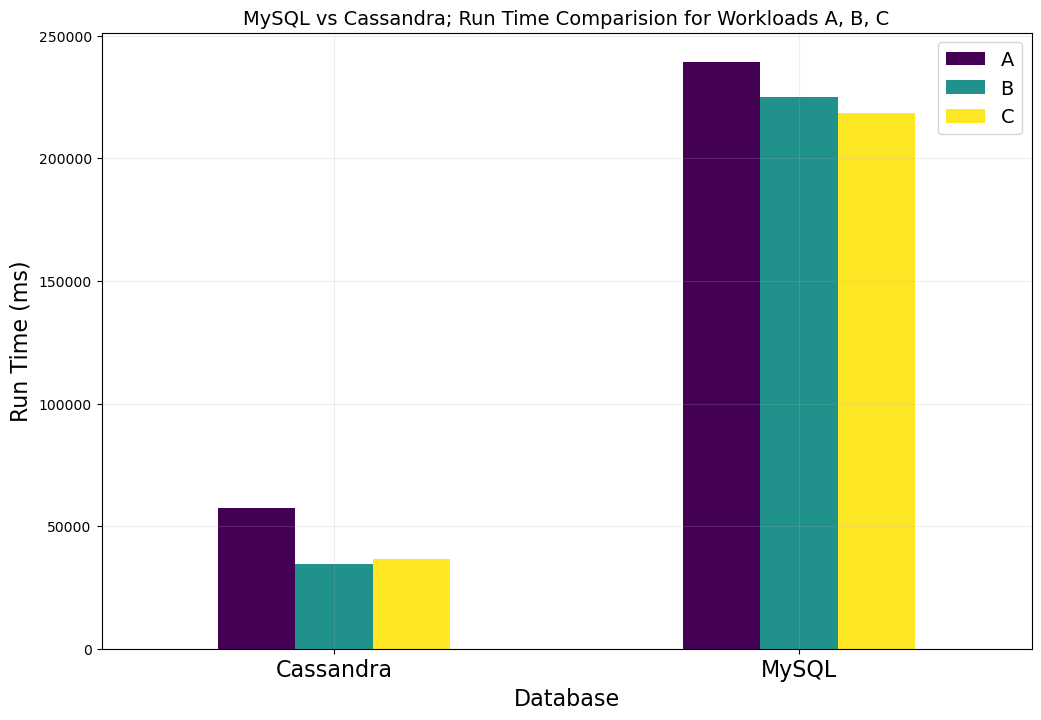

In [22]:
plt.figure(figsize=(12,8))
runtime_bar.plot(x='database', kind='bar', stacked=False, ax=plt.gca(), colormap='viridis')
plt.title('MySQL vs Cassandra; Run Time Comparision for Workloads A, B, C', fontsize=14)
plt.ylabel('Run Time (ms)',size=16)
plt.xlabel('Database',size=16)
plt.xticks(rotation=0, fontsize=16) 
plt.grid(True,alpha=.2)
plt.legend(fontsize=14)
plt.show()

In [27]:
#pivoting the table to enable grouped bar chart plot
throughput_bar = df_50000.pivot(index='database',columns='workload',values='throughput')
throughput_bar = throughput_bar.reset_index()
throughput_bar

workload,database,A,B,C
0,Cassandra,871.0649,1443.126380,1362.95488
1,MySQL,208.9672,222.100807,228.96184


### plotting a grouped bar chart to compare throughput for 50000 operations:

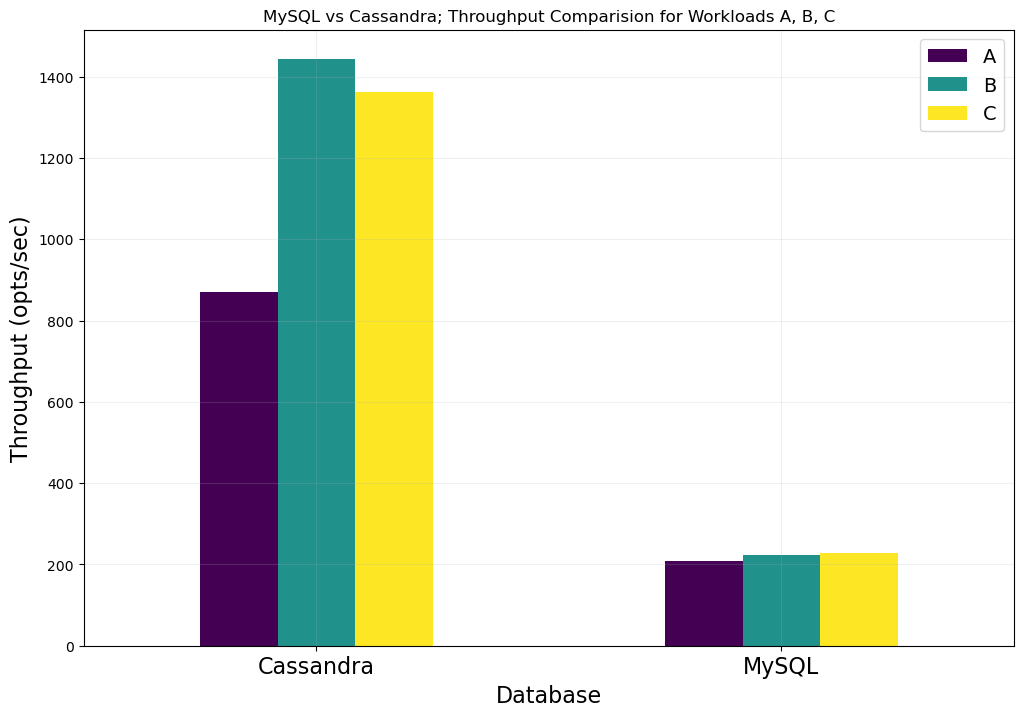

In [29]:

plt.figure(figsize=(12,8))
throughput_bar.plot(x='database', kind='bar', stacked=False, ax=plt.gca(), colormap='viridis')
plt.title('MySQL vs Cassandra; Throughput Comparision for Workloads A, B, C')
plt.ylabel('Throughput (opts/sec)',size=16)
plt.xlabel('Database',size=16)
plt.xticks(rotation=0, fontsize=16) 
plt.grid(True,alpha=.2)
plt.legend(fontsize=14)
plt.show()

In [24]:
#pivoting the table to enable grouped bar chart plot
insert_latency_bar = df_50000.pivot(index='database',columns='workload',values='insert_latency')
insert_latency_bar = insert_latency_bar.reset_index()
insert_latency_bar

workload,database,A,B,C
0,Cassandra,1022.090,634.0055,675.2134
1,MySQL,4762.054,4487.2093,4349.7253


### plotting a grouped bar chart to compare Insert Latency for 50000 operations

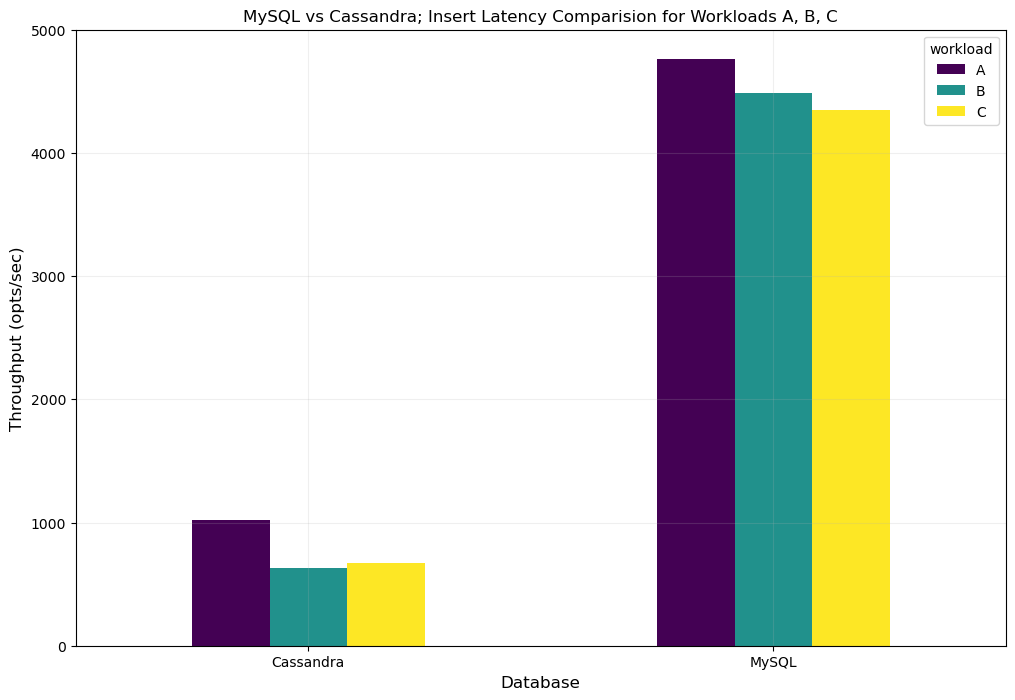

In [25]:

plt.figure(figsize=(12,8))
insert_latency_bar.plot(x='database', kind='bar', stacked=False, ax=plt.gca(), colormap='viridis')
plt.title('MySQL vs Cassandra; Insert Latency Comparision for Workloads A, B, C')
plt.ylabel('Throughput (opts/sec)',size=12)
plt.xlabel('Database',size=12)
plt.xticks(rotation=0)
plt.grid(True,alpha=.2)
plt.show()